In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
matplotlib.rcParams["figure.figsize"]=('16,8')


## Importing training Data

In [2]:
lptr=pd.read_excel("D:\\abishek\\excel sheets\\lp_train.xlsx","in")
lptr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## importing Test Data

In [3]:
lptt=pd.read_csv("D:\\abishek\\excel sheets\\lp_test.csv")

In [4]:
lptt


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
train_orginal=lptr.copy()
test_orginal=lptt.copy()

In [6]:
lptr.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
lptt.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [8]:
lptr.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
lptr.shape

(614, 13)

In [10]:
lptt.shape

(367, 12)

In [11]:
lptr['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
lptr['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

### YES AND NOS

<AxesSubplot:>

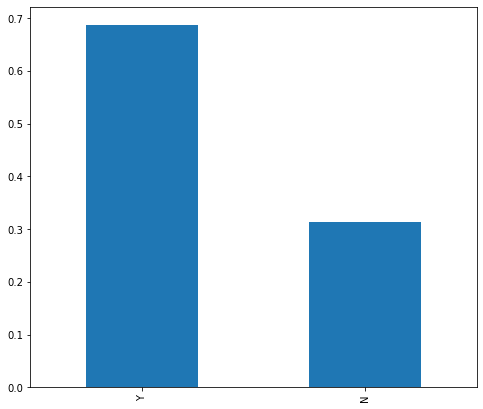

In [13]:
lptr['Loan_Status'].value_counts(normalize=True).plot.bar(figsize=(8,7))

## Univariate Analysis

<AxesSubplot:title={'center':'Credit History'}>

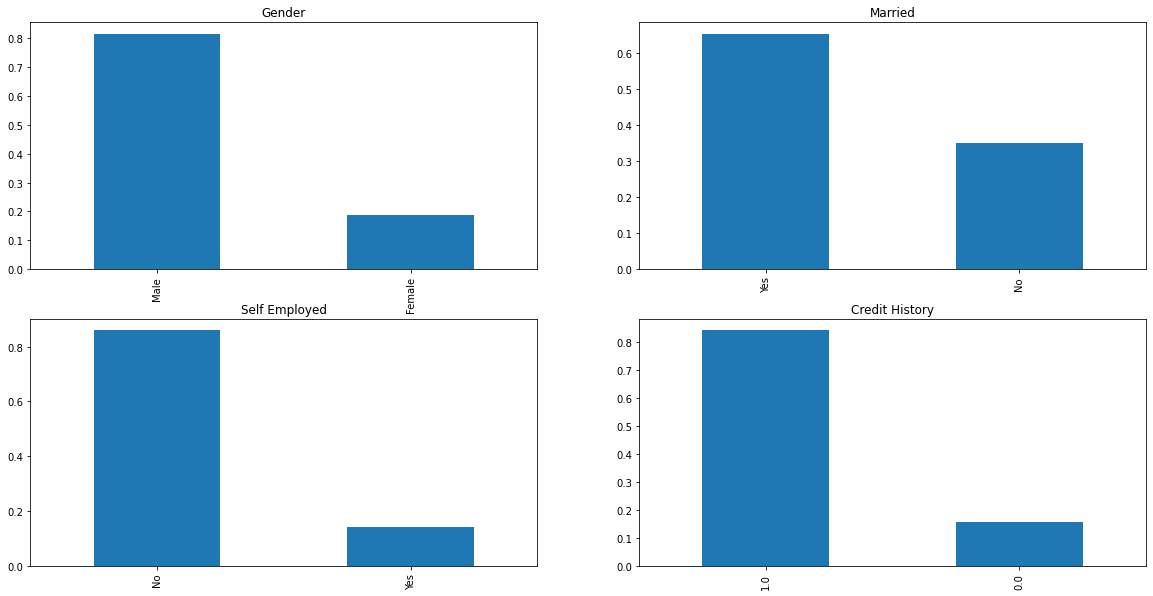

In [14]:
plt.figure(1)
plt.subplot(221)
lptr['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
lptr['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
lptr['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self Employed')
plt.subplot(224)
lptr['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')


<AxesSubplot:title={'center':'Property Area'}>

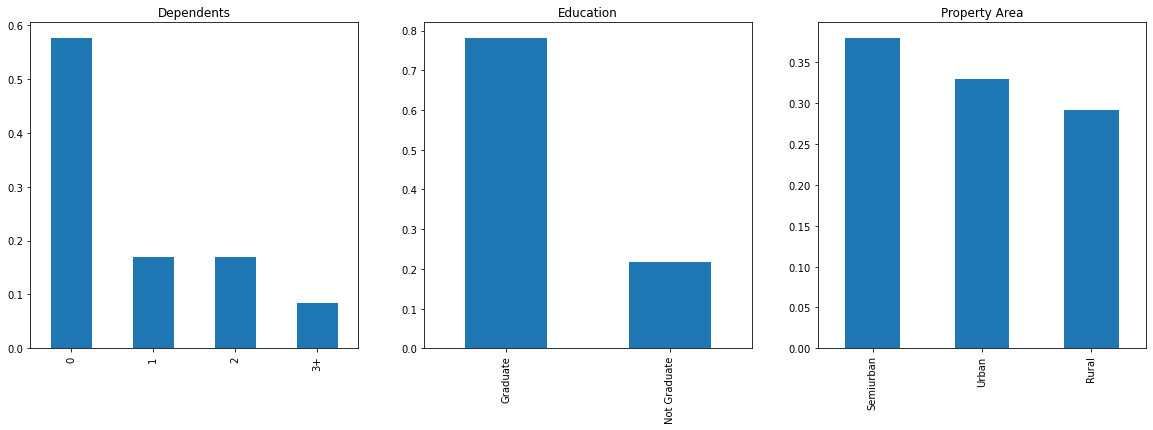

In [15]:
plt.figure(1)
plt.subplot(131)
lptr['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,6),title='Dependents')
plt.subplot(132)
lptr['Education'].value_counts(normalize=True).plot.bar(figsize=(20,6),title='Education')
plt.subplot(133)
lptr['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(20,6),title='Property Area')

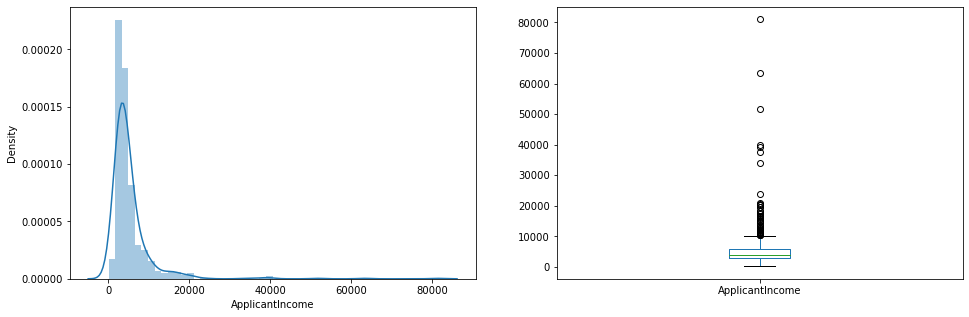

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(lptr['ApplicantIncome']);
plt.subplot(122)
lptr['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

### -->The distribution graph shows the Applicant Income graph is right skewed.
### -->The box plot shows it has many outliners.

Text(0.5, 0.98, '')

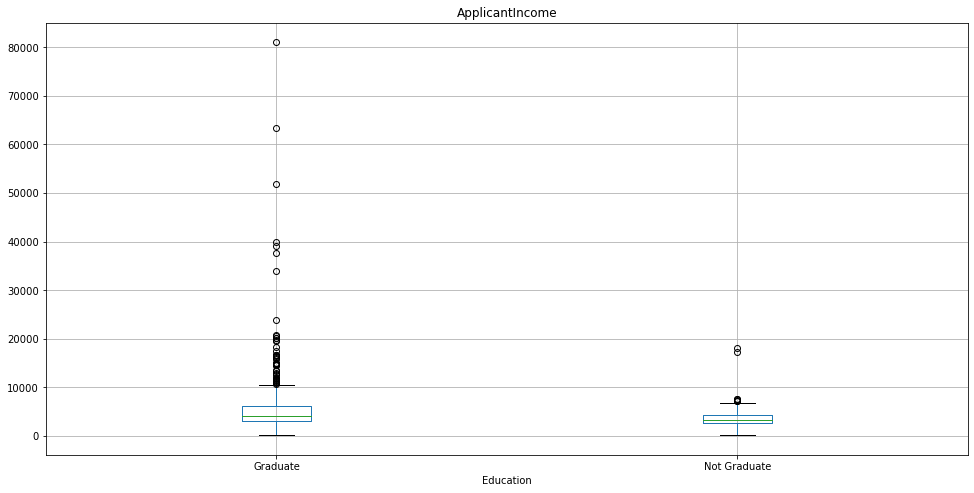

In [17]:
lptr.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

### The above graph shows there are many outliners in Educated people.

<AxesSubplot:>

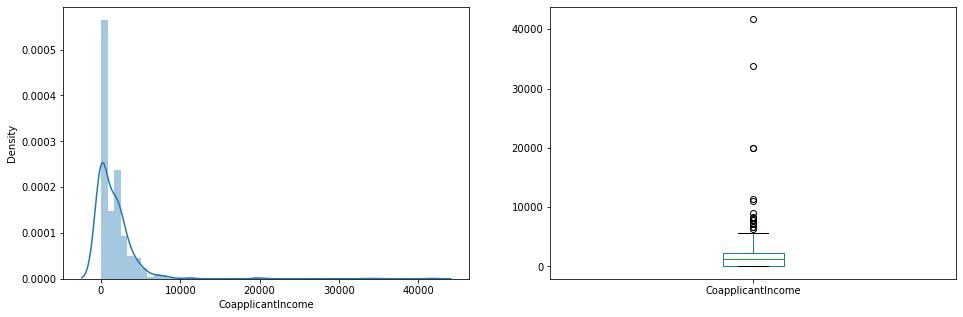

In [18]:
plt.figure(1)
plt.subplot(121)
sns.distplot(lptr['CoapplicantIncome']);
plt.subplot(122)
lptr['CoapplicantIncome'].plot.box(figsize=(16,5))

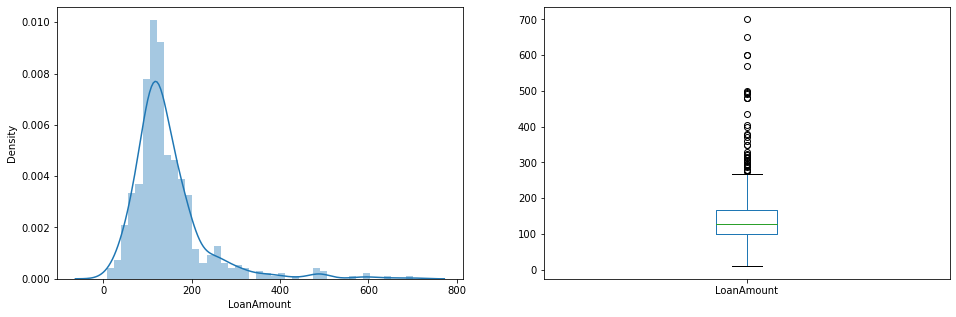

In [19]:
plt.figure(1)
plt.subplot(121)
sns.distplot(lptr['LoanAmount']);
plt.subplot(122)
lptr['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='Gender'>

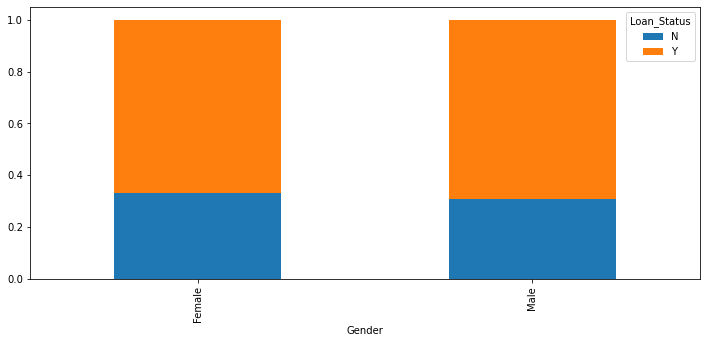

In [20]:
Gender=pd.crosstab(lptr['Gender'],lptr['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot.bar(figsize=(12,5),stacked=True)

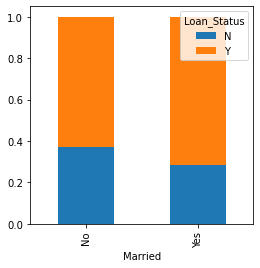

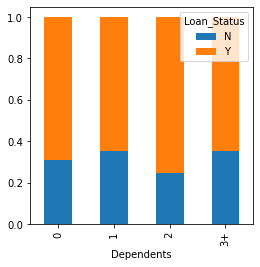

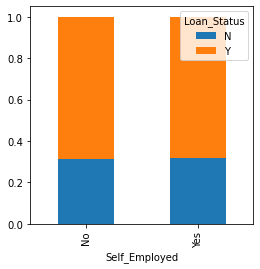

In [21]:
Married=pd.crosstab(lptr['Married'],lptr['Loan_Status'])
Dependents=pd.crosstab(lptr['Dependents'],lptr['Loan_Status'])
Education=pd.crosstab(lptr['Education'],lptr['Loan_Status'])
Self_Employed=pd.crosstab(lptr['Self_Employed'],lptr['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


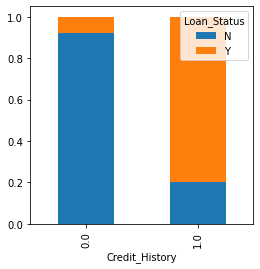

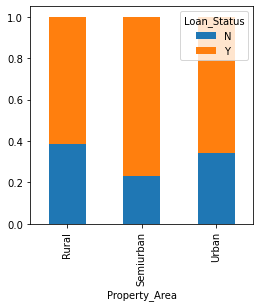

In [22]:
Credit_History=pd.crosstab(lptr['Credit_History'],lptr['Loan_Status'])
Property_Area=pd.crosstab(lptr['Property_Area'],lptr['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

<AxesSubplot:xlabel='Loan_Status'>

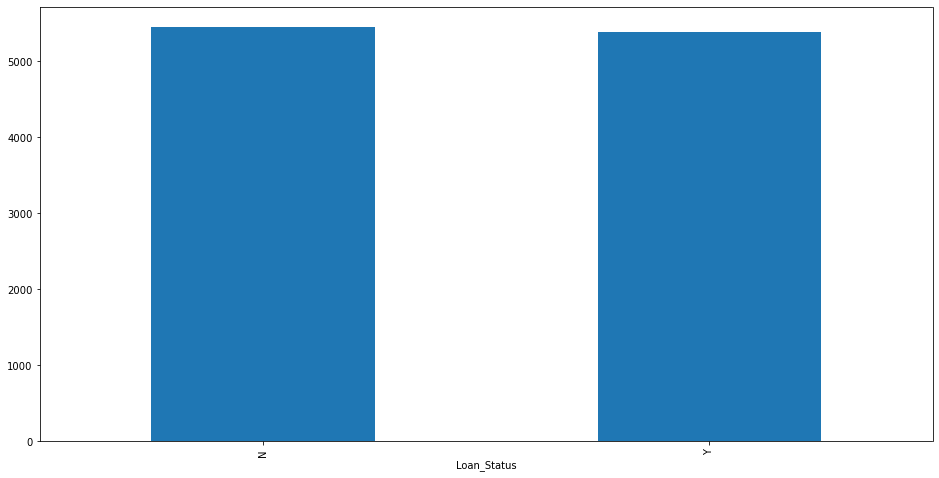

In [23]:
lptr.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

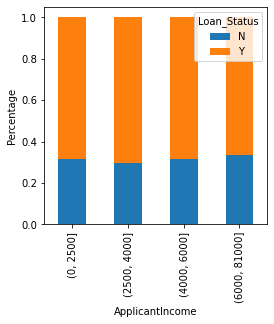

In [24]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
lptr['Income_bin']=pd.cut(lptr['ApplicantIncome'],bins,ordered=True)
Income_bin=pd.crosstab(lptr['Income_bin'],lptr['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

Text(0, 0.5, 'Pecerntage')

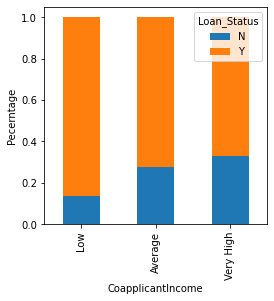

In [25]:
bins=[0,1000,3000,42000]
group=['Low','Average','Very High']
lptr['Coapplicant_Income_bin']=pd.cut(lptr['CoapplicantIncome'],bins,labels=group,ordered=False)
Coapplicant_Income_bin=pd.crosstab(lptr['Coapplicant_Income_bin'],lptr['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel('CoapplicantIncome')
plt.ylabel('Pecerntage')

Text(0, 0.5, 'Percentage')

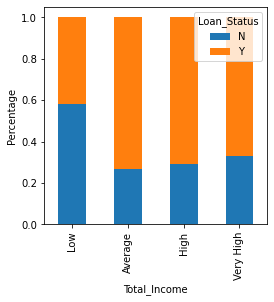

In [26]:
lptr['Total_Income']=lptr['ApplicantIncome']+lptr['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
lptr['Total_Income_bin']=pd.cut(lptr['Total_Income'],bins,labels=group,ordered=False)
Total_Income_bin=pd.crosstab(lptr['Total_Income_bin'],lptr['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

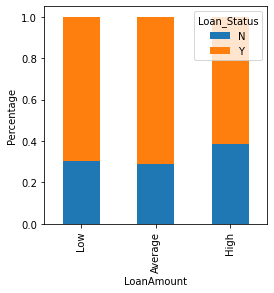

In [27]:
bins=[0,100,200,700]
group=['Low','Average','High',]
lptr['LoanAmount_bin']=pd.cut(lptr['LoanAmount'],bins,labels=group,ordered=False)
LoanAmount_bin=pd.crosstab(lptr['LoanAmount_bin'],lptr['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [28]:
lptr



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,"(4000, 6000]",NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,"(4000, 6000]",Average,6091.0,Very High,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,"(2500, 4000]",NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,"(2500, 4000]",Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,"(4000, 6000]",NaN,6000.0,High,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,"(2500, 4000]",NaN,2900.0,Average,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,"(4000, 6000]",NaN,4106.0,High,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,"(6000, 81000]",Low,8312.0,Very High,High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,"(6000, 81000]",NaN,7583.0,Very High,Average


In [29]:
lptr=lptr.drop(['Income_bin','Total_Income','Total_Income_bin','LoanAmount_bin','Coapplicant_Income_bin'],axis=1)

In [30]:
lptr['Dependents'].replace('3+',3,inplace=True)
lptt['Dependents'].replace('3+',3,inplace=True)
lptr['Loan_Status'].replace('N',0,inplace=True)
lptr['Loan_Status'].replace('Y',1,inplace=True)

<AxesSubplot:>

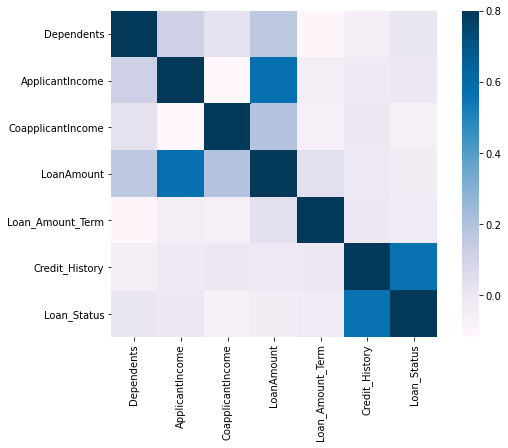

In [31]:
matrix=lptr.corr()
ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="PuBu")


In [32]:
lptr['Gender'].fillna(lptr['Gender'].mode(), inplace=True)
lptr['Married'].fillna(lptr['Married'].mode()[0], inplace=True)
lptr['Dependents'].fillna(lptr['Dependents'].mode()[0], inplace=True)
lptr['Self_Employed'].fillna(lptr['Self_Employed'].mode()[0], inplace=True)
lptr['Credit_History'].fillna(lptr['Credit_History'].mode()[0],inplace=True)


In [33]:
lptr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [34]:
lptr['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
lptr['Loan_Amount_Term'].fillna(lptr['Loan_Amount_Term'].mode()[0], inplace=True)

In [36]:
lptr['LoanAmount'].fillna(lptr['LoanAmount'].median(), inplace=True)

In [37]:
lptt['Gender'].fillna(lptt['Gender'].mode()[0], inplace=True)
lptt['Married'].fillna(lptt['Married'].mode()[0], inplace=True)
lptt['Dependents'].fillna(lptt['Dependents'].mode()[0], inplace=True)
lptt['Self_Employed'].fillna(lptt['Self_Employed'].mode()[0], inplace=True)
lptt['Credit_History'].fillna(lptt['Credit_History'].mode()[0],inplace=True)

In [38]:
lptt['Loan_Amount_Term'].fillna(lptt['Loan_Amount_Term'].mode()[0], inplace=True)
lptt['LoanAmount'].fillna(lptt['LoanAmount'].median(), inplace=True)

In [39]:
lptr['LoanAmount_log']=np.log(lptr['LoanAmount'])
lptt['LoamAmount_log']=np.log(lptt['LoanAmount'])

<AxesSubplot:>

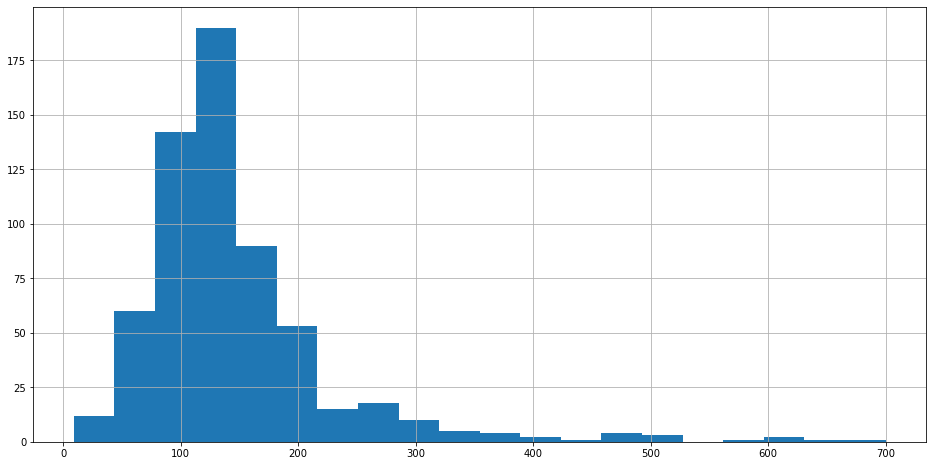

In [40]:
lptr['LoanAmount'].hist(bins=20)

<AxesSubplot:>

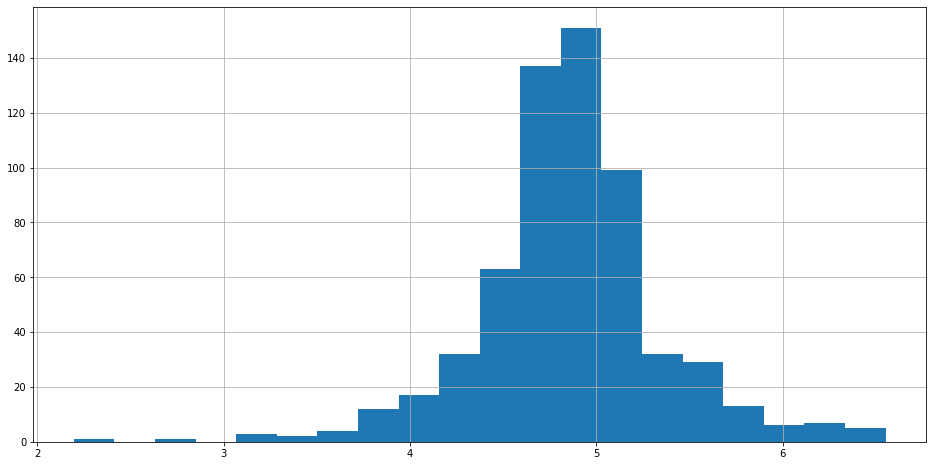

In [41]:
lptr['LoanAmount_log'].hist(bins=20)

In [42]:
lptr=lptr.drop('Loan_ID',axis=1)
lptt=lptt.drop('Loan_ID',axis=1)

In [43]:
X=lptr.drop('Loan_Status',axis=1)
Y=lptr['Loan_Status']

In [44]:
d=lptt['Dependents']

In [45]:
lptt=lptt.drop('Dependents',axis=1)

In [46]:
X=pd.get_dummies(X)
lptr=pd.get_dummies(lptt)
lptt=pd.get_dummies(lptt)

In [47]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,1,0,1,0,0,0,1


# Implementing a ML Model.

## importing train_test_split to provide neccesery values for model.

In [48]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3)

## 1st lets try logistic regression

In [49]:
from sklearn.linear_model import LogisticRegression as LR
model=LR()
model.fit(X_train,Y_train)

LogisticRegression()

In [51]:
pred_cv=model.predict(X_test)

### Evaluation of that model with some known metrices

In [64]:
from sklearn.metrics import recall_score as RS
from sklearn.metrics import accuracy_score as AS

In [65]:
AS(Y_test,pred_cv)

0.8

### accuracy looks normal but we know that accuracy is not the only metrice to judge a model.

In [52]:
RS(Y_test,pred_cv)

0.9457364341085271

### Recall score looks excellent 
#### It is used when we cannot afford false negitives(i.e one's loan status is predicted ineligible whose actual status is eligible.

In [55]:
from sklearn.metrics import precision_score as PS

In [56]:
PS(Y_test,pred_cv)

0.8026315789473685

### Precison score looks normal 
#### It is used when we cannot afford false positives(i.e one's loan status is predicted eligible whose actual status is ineligible.


In [53]:
from sklearn.metrics import f1_score

In [54]:
f1_score(Y_test,pred_cv)

0.8683274021352314

### F1 score looks impressive 
#### It is used when we cannot afford both false negitives and true positives.
#### As it is a loan prediction problem, false prediction of eligible or eligible, both create a mess.
#### So F1 score would be a perfect evaluation metrice for this probelm.

## Now lets try Decision Tree model

In [57]:
from sklearn.tree import DecisionTreeClassifier as DTS

In [58]:
model2=DTS()

In [59]:
model2.fit(X_train,Y_train)

DecisionTreeClassifier()

In [60]:
pred_dt=model2.predict(X_test)

In [66]:
AS(Y_test,pred_dt)

0.7081081081081081

### accuracy is not much good.

In [61]:
RS(Y_test,pred_dt)

0.7829457364341085

In [62]:
PS(Y_test,pred_dt)

0.7952755905511811

In [63]:
f1_score(Y_test,pred_dt)

0.7890625

### F1 score of decision tree looks normal 
## so logistic regression would be better model for this problem.